# Young People Survey Exploratory Data Analysis

### Import packages to use

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the data

In [23]:
df = pd.read_csv("survey.csv")

#### The variables can be split into the following groups:

- Music preferences (19 items)
- Movie preferences (12 items)
- Hobbies & interests (32 items)
- Phobias (10 items)
- Health habits (3 items)
- Personality traits, views on life, & opinions (57 items)
- Spending habits (7 items)
- Demographics (10 items)

#### 1 = The Least and 5 = The most

### Overview

In [30]:
print(df.head())
print(df.shape)

   Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock           ...             Age  \
0      1.0  5.0   5.0                1.0           ...            20.0   
1      2.0  3.0   5.0                4.0           ...            19.0   
2      5.0  3.0   5.0                3.0           ...            20.0   
3      1.0  2.0   2.0                1.0           ...            22.0   
4      3.0  5.0   3.0                1.0           ...            20.0   

   Height  Weight  Number of siblings  Gender  Left - right handed  \
0   163.0    48.0     

#### The data has 1010 rows and 150 columns

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


#### 11 Categorical Variables:
- Alcohol
- Smoking
- Punctuality
- Lying
- Internet usage
- Gender
- Left - right handed
- Education
- Only child
- Village - town
- House - block of flats

#### The rest are either float or integer

# Data Analysis

### Does smoking has relationship with life happiness?
##### Smoking habits has four categories
- Never smoked 
- Tried smoking 
- Former smoker 
- Current smoker

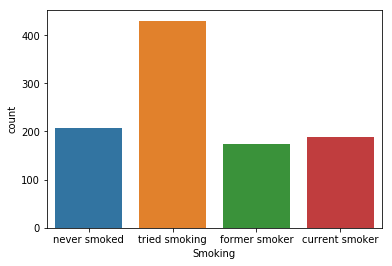

In [62]:
sns.countplot(x = "Smoking", data = df)

From the survey, we observed that more people had tried smoking than never smoked. There are also more smoker than non-smoker in the data.

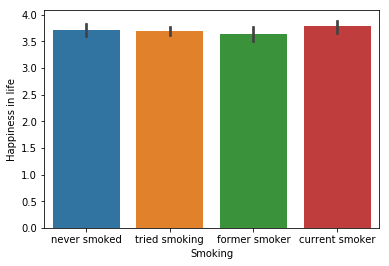

In [67]:
sns.barplot(x = "Smoking", y = "Happiness in life", data = df)

#### Current smoker has the highest score regarding happiness in life, while former smoker has the lowest. In other words, current smokers are the happiest people compared to other groups.

#### However, we need to run formal statistical test to verify the differences are significant.

### Does smoking habits have have relationship with difficulty getting up in the morning?

##### I find it very difficult to get up in the morning.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

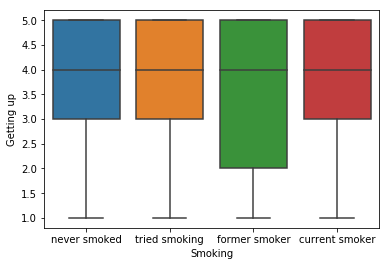

In [76]:
sns.boxplot(x = "Smoking", y = "Getting up", data = df)

#### The median is approximately the same for all groups, but former smokers have higher proportion to disagee with wake up difficulty. Former smoker has the least difficulty getting up compared to others.

### Does smoking habit has anything to do with feeling lonely in life?
I feel lonely in life.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

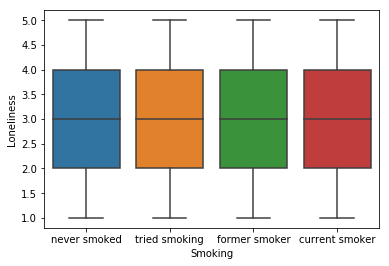

In [81]:
sns.boxplot(x = "Smoking", y = "Loneliness", data = df)

#### Smoking habit has nothing to do with loneliness.

### Any relationship between smoking and saving habit?
I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

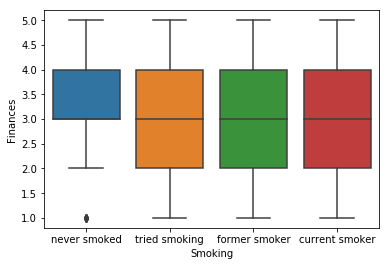

In [87]:
sns.boxplot(x = "Smoking", y = "Finances", data = df)

#### People who never smoked have higher tendency to save all the money they can compared to smokers.

### Relationship between believes in God and smoking habit?
I believe in God.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)


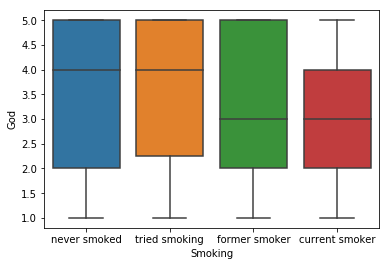

In [90]:
sns.boxplot(x = "Smoking", y = "God", data = df)

#### Current smoker and former smoker don't believe in God as much as people who never smoked and tried smoking. In particular, majoirty of current smoker have no strong opinion in this topic.

### Do we see the same effect across gender?

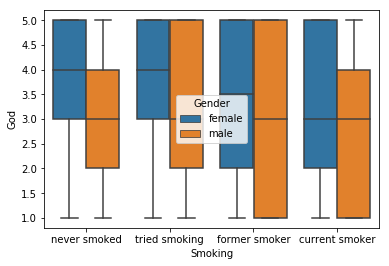

In [92]:
sns.boxplot(x = "Smoking", y = "God", hue = "Gender", data = df)

In [96]:
print(df.groupby(["Gender","Smoking"])["God"].describe())

                       count      mean       std  min  25%  50%  75%  max
Gender Smoking                                                           
female current smoker  111.0  3.207207  1.471654  1.0  2.0  3.0  5.0  5.0
       former smoker   108.0  3.324074  1.458643  1.0  2.0  3.5  5.0  5.0
       never smoked    122.0  3.688525  1.499763  1.0  3.0  4.0  5.0  5.0
       tried smoking   246.0  3.540650  1.392536  1.0  3.0  4.0  5.0  5.0
male   current smoker   78.0  2.794872  1.480251  1.0  1.0  3.0  4.0  5.0
       former smoker    65.0  2.923077  1.689191  1.0  1.0  3.0  5.0  5.0
       never smoked     84.0  3.023810  1.447692  1.0  2.0  3.0  4.0  5.0
       tried smoking   180.0  3.266667  1.459318  1.0  2.0  3.0  5.0  5.0


#### Male score lower in all smoking groups. Therefore, more female belive in God compare to male. 

### Does male and female have different spending habits?
### Saving
I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

        count      mean       std  min  25%  50%  75%  max
Gender                                                    
female  591.0  3.084602  1.128799  1.0  2.0  3.0  4.0  5.0
male    410.0  2.941463  1.166563  1.0  2.0  3.0  4.0  5.0


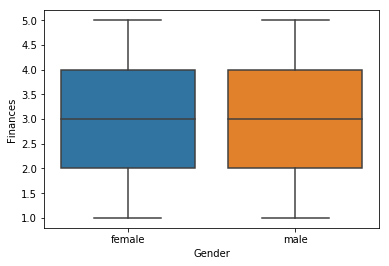

In [111]:
sns.boxplot(x = "Gender", y = "Finances", data = df)
print(df.groupby("Gender")["Finances"].describe())

#### We don't see any different in saving habit across gender

### Shopping
I enjoy going to large shopping centres.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

        count      mean       std  min  25%  50%  75%  max
Gender                                                    
female  591.0  3.421320  1.313613  1.0  2.0  4.0  5.0  5.0
male    411.0  2.970803  1.291293  1.0  2.0  3.0  4.0  5.0


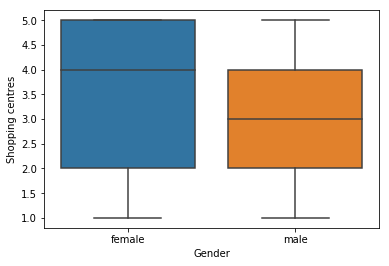

In [113]:
sns.boxplot(x = "Gender", y = "Shopping centres", data = df)
print(df.groupby("Gender")["Shopping centres"].describe())

 #### Female prefer going to large shopping centers than male

### Branded Clothing
I prefer branded clothing to non branded.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

        count      mean       std  min  25%  50%  75%  max
Gender                                                    
female  591.0  2.864636  1.281664  1.0  2.0  3.0  4.0  5.0
male    411.0  3.321168  1.296906  1.0  2.0  4.0  4.0  5.0


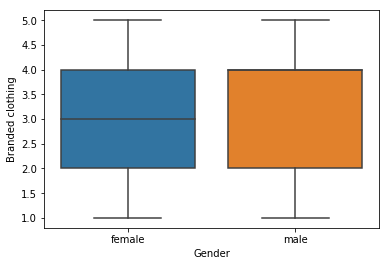

In [114]:
sns.boxplot(x = "Gender", y = "Branded clothing", data = df)
print(df.groupby("Gender")["Branded clothing"].describe())

#### Female prefer branded clothing compare to male

### Socialize and party
I spend a lot of money on partying and socializing.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

        count      mean       std  min  25%  50%  75%  max
Gender                                                    
female  592.0  3.023649  1.191956  1.0  2.0  3.0  4.0  5.0
male    409.0  3.454768  1.136961  1.0  3.0  4.0  4.0  5.0


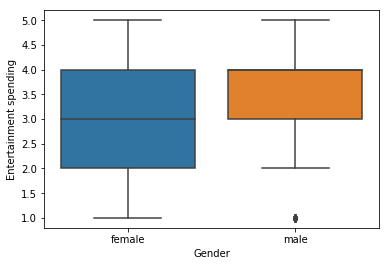

In [117]:
sns.boxplot(x = "Gender", y = "Entertainment spending", data = df)
print(df.groupby("Gender")["Entertainment spending"].describe())

#### Male spend a lot more on partying and socialzing than female

### Appearance
I spend a lot of money on my appearance.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

        count      mean       std  min  25%  50%  75%  max
Gender                                                    
female  592.0  3.231419  1.190270  1.0  2.0  3.0  4.0  5.0
male    409.0  2.929095  1.207558  1.0  2.0  3.0  4.0  5.0


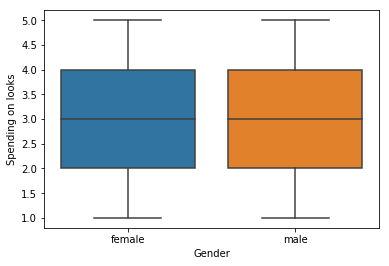

In [119]:
sns.boxplot(x = "Gender", y = "Spending on looks", data = df)
print(df.groupby("Gender")["Spending on looks"].describe())

#### Female spend slightly more on appearance than male

### Gadgets
I spend a lot of money on gadgets.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

        count      mean       std  min  25%  50%  75%  max
Gender                                                    
female  593.0  2.581788  1.230444  1.0  2.0  2.0  3.0  5.0
male    411.0  3.291971  1.242503  1.0  2.0  3.0  4.0  5.0


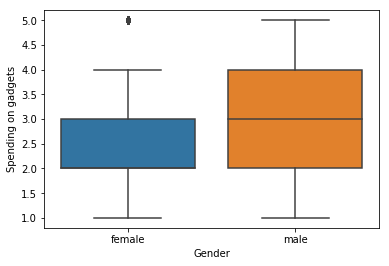

In [121]:
sns.boxplot(x = "Gender", y = "Spending on gadgets", data = df)
print(df.groupby("Gender")["Spending on gadgets"].describe())

#### Male spend a lot more on gadgets compare to female

### Healthy food
I will hapilly pay more money for good, quality or healthy food.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)

        count      mean       std  min  25%  50%  75%  max
Gender                                                    
female  592.0  3.548986  1.096510  1.0  3.0  4.0  4.0  5.0
male    410.0  3.560976  1.093407  1.0  3.0  4.0  4.0  5.0


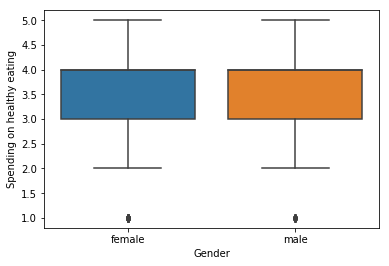

In [123]:
sns.boxplot(x = "Gender", y = "Spending on healthy eating", data = df)
print(df.groupby("Gender")["Spending on healthy eating"].describe())

#### Female and male are almost equally likely to spend money on healthy and quality food

### In conclusion, we observed that male are more willing to spend money on gadgets and entertainment (partying and socializing). On the other hand, female are more willing to spend money on appearance, branded clothing and shopping. Both genders have similar saving habits.

### Does gender and smoking habit has anything to do with enjoying watching movie?

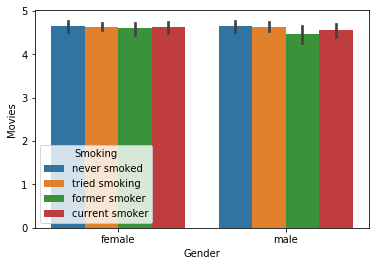

In [126]:
sns.barplot(x = "Gender", y = "Movies", hue = "Smoking", data = df)

#### It appears that everyone enjoy watching movie and no significant difference between groups

### Horror movie and gender

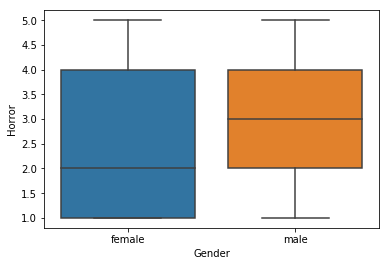

In [131]:
sns.boxplot(x = "Gender", y = "Horror", data = df)

#### Male like horror movie more than female

### Does spending on appearance correlates with childhood environment?

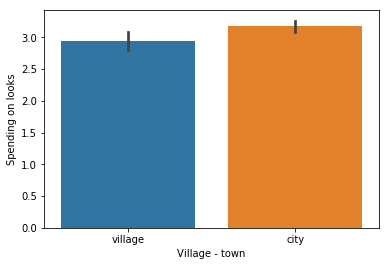

In [139]:
sns.barplot(x = "Village - town", y = "Spending on looks", data = df)

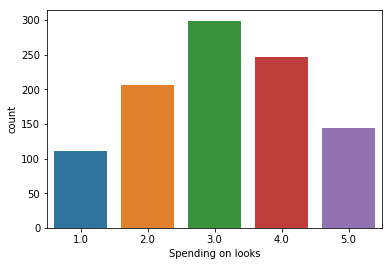

In [141]:
sns.countplot(x = "Spending on looks", data = df)

#### People who grew up in city spend more money on appearance compared to people who grew up in village

### Does gender and only child affects interest in pets?

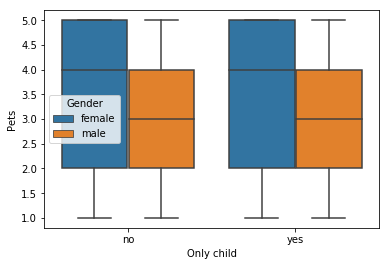

In [144]:
sns.boxplot(x = "Only child", y = "Pets", hue = "Gender", data = df)

#### Whether the person is only child or not doesn't affect interest in pets. However, female has much higher interest in pets compare to male.